In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
file_list=[]


for filename in os.listdir('./data/output/'):
    if filename.endswith(".pkl") and '2008' in filename: # or '2009' in filename or '2010' in filename:
        unpickle = './data/output/'+str(filename)
        print(unpickle)
        file_list.append(pd.read_pickle(unpickle))
 
 
MASTER = pd.concat(file_list)
MASTER['time'] = pd.to_datetime(MASTER['time'])

print(MASTER.columns)

./data/output/df2008.pkl
Index(['ColumnCode', 'ColumnDescription', 'ItemDescription', 'ItemNumber',
       'Value', 'TableNumber', 'Type', 'Description', 'TheYear', 'TheMonth',
       'TheDay', 'InstitutionCode', 'InstitutionDescription', 'LastModified',
       'time'],
      dtype='object')


In [2]:
# show portfolio weights for absa's credit book
from assets_to_weights import *

transform=tranformer()

years=[str(i) for i in range(2008,2021, 1)]
months=["{:02d}".format(i) for i in range(1,13)]


top5=[ 'ABSA BANK LTD ',\
        'THE STANDARD BANK OF S A LTD ',\
        MASTER[MASTER['InstitutionDescription'].str.contains('NEDBANK')]['InstitutionDescription'].values[0],\
        MASTER[MASTER['InstitutionDescription'].str.contains('FIRSTRAND')]['InstitutionDescription'].values[0],\
        MASTER[MASTER['InstitutionDescription'].str.contains('CAPITEC BANK')]['InstitutionDescription'].values[0]
      ]

df=MASTER[MASTER.InstitutionDescription.isin(top5)]

In [69]:
#make weights

arr = np.empty((0,len(df[df['InstitutionDescription'].str.contains('ABSA BANK LTD ')].time.unique()))) 
 
for b in top5[:-1]:
    test=transform.get_bankdata(years,months,df, b)

    # # we only need one entry per month - so select column code 7 and itemnumber 2 for example 
    test_weights=test[(test['ColumnCode']=='7')&(test['ItemNumber']=='2')]
    test_weights.index=test_weights.time
    # f = plt.figure()
    # plt.title('ABSA portfolio weights', color='black') 
    # for column in test_weights[test.columns[-19:-10]]:
    #     test_weights[column].plot(legend=column, ax=f.gca())
    # plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    # plt.show()
    weights_only=test_weights[test_weights.columns[-29:]] 
    d=weights_only.filter(like='Household_mortgages').squeeze().values 
    arr=np.vstack((arr,d))

/Users/admin/git_repos/ba900/assets_to_weights.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BANK['Value'] = pd.to_numeric(BANK['Value'])
/Users/admin/git_repos/ba900/assets_to_weights.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["m{}_{}".format(count,name)]= 0
/Users/admin/git_repos/ba900/assets_to_weights.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

all data returned for  ABSA BANK LTD 
all data returned for  THE STANDARD BANK OF S A LTD 
all data returned for  NEDBANK LTD 
all data returned for  FIRSTRAND BANK LIMITED 


In [70]:
arr

array([[0.33831132, 0.34437546, 0.33929757, 0.34173445, 0.33836443,
        0.32339411, 0.33556795, 0.34546296, 0.33498147, 0.30706184,
        0.31556379, 0.32514626],
       [0.25960144, 0.245513  , 0.24422092, 0.25612439, 0.25552579,
        0.24741084, 0.26292057, 0.26287043, 0.25490991, 0.23394   ,
        0.23441237, 0.23291089],
       [0.25018038, 0.25009675, 0.24277058, 0.24249516, 0.24020222,
        0.23932848, 0.24116713, 0.24368348, 0.24314693, 0.2374223 ,
        0.23741459, 0.24158468],
       [0.22805535, 0.22851924, 0.23138709, 0.21963496, 0.21933039,
        0.21362933, 0.22025164, 0.22333144, 0.22420568, 0.20290722,
        0.19902814, 0.20132973]])

In [12]:
len(arr[0]), arr[1]

(12,
 array([0.25960144, 0.245513  , 0.24422092, 0.25612439, 0.25552579,
        0.24741084, 0.26292057, 0.26287043, 0.25490991, 0.23394   ,
        0.23441237, 0.23291089]))

In [5]:
top5

['ABSA BANK LTD ',
 'THE STANDARD BANK OF S A LTD ',
 'NEDBANK LTD ',
 'FIRSTRAND BANK LIMITED ',
 'CAPITEC BANK ']

,ABSA BANK LTD,THE STANDARD BANK OF S A LTD,NEDBANK LTD,FIRSTRAND BANK LIMITED
ABSA BANK LTD,NaN,NaN,NaN,NaN
THE STANDARD BANK OF S A LTD,NaN,NaN,NaN,NaN
NEDBANK LTD,NaN,NaN,NaN,NaN
FIRSTRAND BANK LIMITED,NaN,NaN,NaN,NaN


In [ ]:
from scipy.spatial import distance
 
dst = distance.euclidean(arr[0], arr[1])
dst 

,ABSA BANK LTD,THE STANDARD BANK OF S A LTD,NEDBANK LTD,FIRSTRAND BANK LIMITED,CAPITEC BANK
0,0.338311,0.259601,0.250180,0.228055,0.0
1,0.344375,0.245513,0.250097,0.228519,0.0
2,0.339298,0.244221,0.242771,0.231387,0.0
3,0.341734,0.256124,0.242495,0.219635,0.0
4,0.338364,0.255526,0.240202,0.219330,0.0
5,0.323394,0.247411,0.239328,0.213629,0.0
6,0.335568,0.262921,0.241167,0.220252,0.0
7,0.345463,0.262870,0.243683,0.223331,0.0
8,0.334981,0.254910,0.243147,0.224206,0.0
9,0.307062,0.233940,0.237422,0.202907,0.0


In [ ]:
dist = np.linalg.norm(arr[1]-arr[0])


In [20]:
#This is what is going on
def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

dist_a_b = dist(arr[0],arr[1])
dist_a_b

In [66]:
t4=filler

for bank1 in top4:
    
    for bank2 in top4:
 
        t4.at[bank2, bank1] =np.linalg.norm(w[bank1]-w[bank2])
#     print(w['ABSA BANK LTD ']-w[i])
t4

,ABSA BANK LTD,THE STANDARD BANK OF S A LTD,NEDBANK LTD,FIRSTRAND BANK LIMITED
ABSA BANK LTD,0,0.289696,0.313318,0.398239
THE STANDARD BANK OF S A LTD,0.289696,0,0.0409128,0.113007
NEDBANK LTD,0.313318,0.0409128,0,0.0905487
FIRSTRAND BANK LIMITED,0.398239,0.113007,0.0905487,0


In [58]:
t3=t2
w['ABSA BANK LTD '] 

for i in top5:
#     print(np.linalg.norm(w['ABSA BANK LTD ']-w[i]))
    t3.at[i, 'ABSA BANK LTD '] =np.linalg.norm(w['ABSA BANK LTD ']-w[i])
#     print(w['ABSA BANK LTD ']-w[i])

for i in top5:
#     print(np.linalg.norm(w['ABSA BANK LTD ']-w[i]))
    t3.at[i, 'THE STANDARD BANK OF S A LTD '] =np.linalg.norm(w['THE STANDARD BANK OF S A LTD ']-w[i])

,ABSA BANK LTD,THE STANDARD BANK OF S A LTD,NEDBANK LTD,FIRSTRAND BANK LIMITED,CAPITEC BANK
ABSA BANK LTD,0,0.289696,0.313318,0.398239,1.152293
THE STANDARD BANK OF S A LTD,0.289696,0,0.040913,0.113007,0.864031
NEDBANK LTD,0.313318,0.0409128,0.000000,0.090549,0.840010
FIRSTRAND BANK LIMITED,0.398239,0.113007,0.090549,0.000000,0.754802
CAPITEC BANK,1.15229,0.864031,0.840010,0.754802,0.000000


In [97]:


test=transform.get_bankdata(years,months,df, 'ABSA BANK LTD ')
# # we only need one entry per month - so select column code 7 and itemnumber 2 for example 
test_weights=test[(test['ColumnCode']=='7')&(test['ItemNumber']=='2')]
test_weights.index=test_weights.time
weights_only=test_weights[test_weights.columns[-29:]] 
print(weights_only.T)

dic={}
dic[weights_only.T.columns[0]]=weights_only.T[weights_only.T.columns[0]]
dic[weights_only.T.columns[0]].columns=['ABSA BANK LTD ']

In [112]:
dic[list(dic.keys())[0]] 

m1_South_African_bank_notes_and_subsidiary_coin             0.005127
m2_Gold_coin_and_bullion                                    0.000000
m3_Domestic_currency_deposits_with_SA_Reserve_Bank          0.017457
m4_SA_Interbank                                             0.024326
m5_Rand_Deposits_to_and_loans_to_foreign_banks              0.000951
m6_Loans_granted_under_repo_agreement                       0.060282
m7_Foreign_currency_loans_and_advances                      0.023252
m8_Redeemable_preference_shares                             0.007209
m9_Corporate_installments                                   0.023128
m10_Household_installments                                  0.040548
m11_Corporate_mortgages                                     0.095858
m12_Household_mortgages                                     0.338311
m13_Corporate_credit_card                                   0.000658
m14_Household_credit_card                                   0.022391
m15_Corporate_leasing             

In [115]:
w

time,2008-01-01,2008-02-01,2008-03-01,2008-04-01,2008-05-01,2008-06-01,2008-07-01,2008-08-01,2008-09-01,2008-10-01,2008-11-01,2008-12-01
m1_South_African_bank_notes_and_subsidiary_coin,0.004497,0.004375,0.003913,5.639251e-03,0.003742,3.806723e-03,4.418899e-03,0.004138,4.360005e-03,3.924769e-03,3.727940e-03,0.004539
m2_Gold_coin_and_bullion,0.000002,0.000039,0.000024,1.411455e-07,0.000000,7.642391e-07,4.868162e-07,0.000089,6.811085e-07,2.508042e-07,1.795675e-07,0.000008
m3_Domestic_currency_deposits_with_SA_Reserve_Bank,0.013384,0.012881,0.013555,1.285815e-02,0.012599,1.225964e-02,1.286831e-02,0.013335,1.334464e-02,1.170797e-02,1.129306e-02,0.010539
m4_SA_Interbank,0.015073,0.005261,0.022157,1.605006e-02,0.013524,2.667847e-02,8.451914e-03,0.008326,1.248743e-02,1.193235e-02,1.637669e-02,0.031123
m5_Rand_Deposits_to_and_loans_to_foreign_banks,0.010981,0.010276,0.008862,1.033521e-02,0.010980,6.579425e-03,1.532279e-02,0.016582,1.507534e-02,7.622297e-03,1.479610e-02,0.027455
m6_Loans_granted_under_repo_agreement,0.028828,0.029244,0.027649,2.226239e-02,0.029208,2.802008e-02,2.895860e-02,0.028144,2.781349e-02,1.631798e-02,1.457313e-02,0.016880
m7_Foreign_currency_loans_and_advances,0.098300,0.129362,0.102649,9.060192e-02,0.084010,8.478367e-02,8.229882e-02,0.078314,9.134505e-02,1.033762e-01,9.718931e-02,0.087844
m8_Redeemable_preference_shares,0.018110,0.015497,0.015271,1.537469e-02,0.014937,1.597286e-02,1.751762e-02,0.017366,2.075426e-02,1.871088e-02,1.837649e-02,0.018859
m9_Corporate_installments,0.042240,0.038825,0.038787,4.048946e-02,0.040085,3.920967e-02,4.133725e-02,0.041324,4.008366e-02,3.603343e-02,3.602458e-02,0.035509
m10_Household_installments,0.027021,0.025361,0.025144,2.638600e-02,0.025813,2.445782e-02,2.552115e-02,0.025156,2.415991e-02,2.221613e-02,2.111307e-02,0.020801


# Get time series

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
file_list=[]


for filename in os.listdir('./data/output/'):
    if filename.endswith(".pkl") and '2008' in filename or '2018' in filename: # or '2010' in filename:
        unpickle = './data/output/'+str(filename)
        print(unpickle)
        file_list.append(pd.read_pickle(unpickle))
 
 
MASTER = pd.concat(file_list)
MASTER['time'] = pd.to_datetime(MASTER['time'])

print(MASTER.columns)


./data/output/df2018.pkl
./data/output/df2008.pkl
Index(['ColumnCode', 'ColumnDescription', 'ItemDescription', 'ItemNumber',
       'Value', 'TableNumber', 'Type', 'Description', 'TheYear', 'TheMonth',
       'TheDay', 'InstitutionCode', 'InstitutionDescription', 'LastModified',
       'time'],
      dtype='object')


In [6]:

# show portfolio weights for absa's credit book
from assets_to_weights import *

transform=tranformer()
years=[str(i) for i in range(2008,2021, 1)]
months=["{:02d}".format(i) for i in range(1,13)]

top4=[ 'ABSA BANK LTD ',\
        'THE STANDARD BANK OF S A LTD ',\
        MASTER[MASTER['InstitutionDescription'].str.contains('NEDBANK')]['InstitutionDescription'].values[0],\
        MASTER[MASTER['InstitutionDescription'].str.contains('FIRSTRAND')]['InstitutionDescription'].values[0],\
#         MASTER[MASTER['InstitutionDescription'].str.contains('CAPITEC BANK')]['InstitutionDescription'].values[0]
      ]
#alles 2008
df=MASTER[MASTER.InstitutionDescription.isin(top4)]
   
y = ['2008','2018']
m = ['11','12']
data=transform.get_weights_banks_timeseries_29assets(y,m,df,top4)


/Users/admin/git_repos/ba900/assets_to_weights.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BANK['Value'] = pd.to_numeric(BANK['Value'])
/Users/admin/git_repos/ba900/assets_to_weights.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["m{}_{}".format(count,name)]= 0
/Users/admin/git_repos/ba900/assets_to_weights.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

2008  processed
2018  processed


In [13]:
t=transform.create_similarity_matrix(top4,data,list(data.keys())[1])
 # Make heatmap
import pandas as pd
import numpy as np 
import seaborn as sns; sns.set_theme()
 
cmap = sns.cm.rocket_r

heat=t.apply(pd.to_numeric)
ax = sns.heatmap(heat,annot=True, cmap=cmap)
t


2008-11-01 00:00:00
2008-12-01 00:00:00
2009-11-01 00:00:00
2009-12-01 00:00:00


,ABSA BANK LTD,THE STANDARD BANK OF S A LTD,NEDBANK LTD,FIRSTRAND BANK LIMITED
ABSA BANK LTD,0,0.159865,0.158458,0.148015
THE STANDARD BANK OF S A LTD,0.159865,0,0.232936,0.140056
NEDBANK LTD,0.158458,0.232936,0,0.190355
FIRSTRAND BANK LIMITED,0.148015,0.140056,0.190355,0


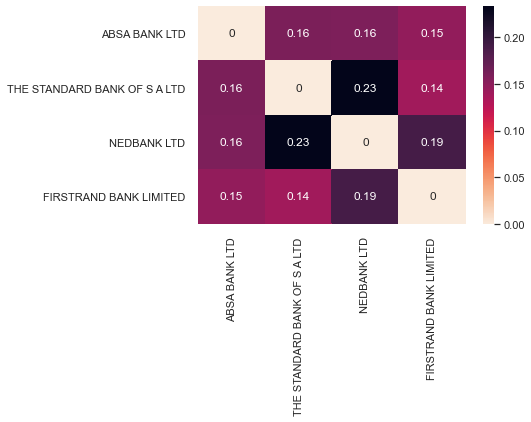

In [9]:
t=transform.create_similarity_matrix(top4,data,list(data.keys())[0])
 # Make heatmap
import pandas as pd
import numpy as np 
import seaborn as sns; sns.set_theme()
 
cmap = sns.cm.rocket_r

heat=t.apply(pd.to_numeric)
ax = sns.heatmap(heat,annot=True, cmap=cmap)
t

In [ ]:
selected

In [45]:

# show portfolio weights for absa's credit book
from assets_to_weights import *

transform=tranformer()
years=[str(i) for i in range(2008,2021, 1)]
months=["{:02d}".format(i) for i in range(1,13)]

top4=[ 'ABSA BANK LTD ',\
        'THE STANDARD BANK OF S A LTD ',\
        MASTER[MASTER['InstitutionDescription'].str.contains('NEDBANK')]['InstitutionDescription'].values[0],\
        MASTER[MASTER['InstitutionDescription'].str.contains('FIRSTRAND')]['InstitutionDescription'].values[0],\
#         MASTER[MASTER['InstitutionDescription'].str.contains('CAPITEC BANK')]['InstitutionDescription'].values[0]
      ]

allbanks=MASTER['InstitutionDescription'].unique()
selected=['SASFIN BANK LTD ','BIDVEST BANK LIMITED ','NEDBANK LTD ',\
         'AFRICAN BANK LIMITED ','BIDVEST BANK LIMITED ',\
          'ABSA BANK LTD ', 'FIRSTRAND BANK LIMITED ',  \
#          ,'THE S A BANK OF ATHENS LTD ',
         'DEUTSCHE BANK AG ','INVESTEC BANK LTD ','CAPITEC BANK ',\
          'BANK OF CHINA LTD JHB BRANCH    ',\
           'SOCIETE GENERALE JOHANNESBURG   BRANCH ', 'CITIBANK N.A ',
           'GBS MUTUAL BANK ','ALBARAKA BANK LTD ',
          'THE STANDARD BANK OF S A LTD ','HABIB OVERSEAS BANK LTD ','BANK OF BARODA ',
            'MERCANTILE BANK LTD ','BANK OF TAIWAN SOUTH AFRICA     BRANCH ',
         ]

df=MASTER[MASTER.InstitutionDescription.isin(selected)]
   
y = ['2008','2018']
m = ['11','12']
data=transform.get_weights_banks_timeseries_29assets(y,m,df,selected)

2008  processed
2018  processed


In [47]:
print(len(selected))
allbanks

21


array(['SASFIN BANK LTD ', 'BIDVEST BANK LIMITED ', 'ALBARAKA BANK LTD ',
       'GROBANK LTD ', 'STATE BANK OF INDIA ', 'NEDBANK LTD ',
       'BANK OF BARODA ', 'DISCOVERY BANK LIMITED ', 'ABSA BANK LTD ',
       'GBS MUTUAL BANK ', 'BANK OF TAIWAN SOUTH AFRICA     BRANCH ',
       'TYMEDIGITAL BY COMMONWEALTHBANK SA ', 'INVESTEC BANK LTD ',
       'HABIB OVERSEAS BANK LTD ',
       'SOCIETE GENERALE JOHANNESBURG   BRANCH ', 'AFRICAN BANK LIMITED ',
       'JPMORGAN CHASE BANK             ', 'GRINDROD BANK LTD ',
       'CITIBANK N.A ', 'CAPITEC BANK ', 'VBS MUTUAL BANK ',
       'BANK OF CHINA LTD JHB BRANCH    ', 'ICICI BANK LIMITED ',
       'THE STANDARD BANK OF S A LTD ', 'HBZ BANK LTD ',
       'CHINA CONSTRUCTION BANK         CORPORATION - JHB BRANCH ',
       'THE HONGKONG AND SHANGHAI BANKING CORPORATION LIMITED - JOHANNESBURG BRANCH ',
       'MERCANTILE BANK LTD ', 'CANARA BANK ',
       'BNP PARIBAS SOUTH AFRICA BRANCH ', 'DEUTSCHE BANK AG ',
       'BANK OF INDIA - JOHAN

,SASFIN BANK LTD,BIDVEST BANK LIMITED,NEDBANK LTD,AFRICAN BANK LIMITED,BIDVEST BANK LIMITED,ABSA BANK LTD,FIRSTRAND BANK LIMITED,AFRICAN BANK LIMITED,DEUTSCHE BANK AG,INVESTEC BANK LTD,...,BANK OF CHINA LTD JHB BRANCH,SOCIETE GENERALE JOHANNESBURG BRANCH,CITIBANK N.A,GBS MUTUAL BANK,ALBARAKA BANK LTD,THE STANDARD BANK OF S A LTD,HABIB OVERSEAS BANK LTD,BANK OF BARODA,MERCANTILE BANK LTD,BANK OF TAIWAN SOUTH AFRICA BRANCH
SASFIN BANK LTD,0,0.369134,0.413939,0.977996,0.369134,0.486682,0.415983,0.977996,0.555967,0.442917,...,0.751039,0.698438,0.673878,NaN,0.58277,0.477874,0.612994,0.655525,0.446876,0.553421
BIDVEST BANK LIMITED,0.369134,0,0.357339,0.928986,0,0.450222,0.381376,0.928986,0.410536,0.393342,...,0.568811,0.434503,0.539805,NaN,0.500978,0.413801,0.391536,0.555359,0.308002,0.403418
NEDBANK LTD,0.413939,0.357339,0,0.926219,0.357339,0.158458,0.190355,0.926219,0.464014,0.235333,...,0.727618,0.628163,0.59203,NaN,0.317469,0.232936,0.565662,0.617727,0.303605,0.456349
AFRICAN BANK LIMITED,0.977996,0.928986,0.926219,0,0.928986,0.945728,0.927062,0,0.973853,0.938647,...,1.14094,1.02116,1.05179,NaN,0.992437,0.950406,1.00091,1.06755,0.956336,0.974162
BIDVEST BANK LIMITED,0.369134,0,0.357339,0.928986,0,0.450222,0.381376,0.928986,0.410536,0.393342,...,0.568811,0.434503,0.539805,NaN,0.500978,0.413801,0.391536,0.555359,0.308002,0.403418
ABSA BANK LTD,0.486682,0.450222,0.158458,0.945728,0.450222,0,0.148015,0.945728,0.464525,0.2904,...,0.744922,0.7106,0.568799,NaN,0.36183,0.159865,0.65578,0.673329,0.34932,0.511915
FIRSTRAND BANK LIMITED,0.415983,0.381376,0.190355,0.927062,0.381376,0.148015,0,0.927062,0.382814,0.259065,...,0.713347,0.670064,0.488586,NaN,0.389038,0.140056,0.600274,0.623522,0.339491,0.498489
AFRICAN BANK LIMITED,0.977996,0.928986,0.926219,0,0.928986,0.945728,0.927062,0,0.973853,0.938647,...,1.14094,1.02116,1.05179,NaN,0.992437,0.950406,1.00091,1.06755,0.956336,0.974162
DEUTSCHE BANK AG,0.555967,0.410536,0.464014,0.973853,0.410536,0.464525,0.382814,0.973853,0,0.47104,...,0.615718,0.634087,0.393149,NaN,0.593772,0.390065,0.642231,0.733053,0.438305,0.489973
INVESTEC BANK LTD,0.442917,0.393342,0.235333,0.938647,0.393342,0.2904,0.259065,0.938647,0.47104,0,...,0.732305,0.682098,0.583345,NaN,0.343181,0.301841,0.570345,0.493791,0.298902,0.463899


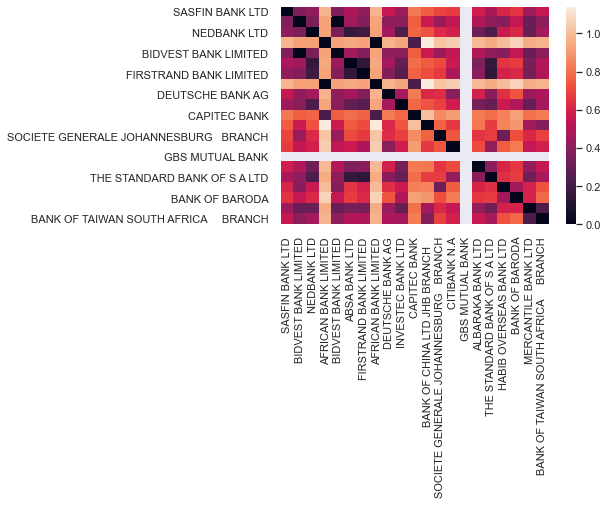

In [51]:
t=transform.create_similarity_matrix(selected,data,list(data.keys())[0])
 # Make heatmap
import pandas as pd
import numpy as np 
import seaborn as sns; sns.set_theme()
 
cmap = sns.cm.rocket #sns.cm.rocket_r

heat=t.apply(pd.to_numeric)
ax = sns.heatmap(heat,  cmap=cmap)
t

/Users/admin/git_repos/ba900/assets_to_weights.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BANK['Value'] = pd.to_numeric(BANK['Value'])
/Users/admin/git_repos/ba900/assets_to_weights.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["m{}_{}".format(count,name)]= 0
/Users/admin/git_repos/ba900/assets_to_weights.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

2008  processed
2018  processed


,AFRICAN BANK LIMITED,BANK OF CHINA LTD JHB BRANCH,DEUTSCHE BANK AG,INVESTEC BANK LTD,CAPITEC BANK,THE STANDARD BANK OF S A LTD,NEDBANK LTD,ABSA BANK LTD,FIRSTRAND BANK LIMITED
AFRICAN BANK LIMITED,0,1.14094,0.973853,0.938647,0.225971,0.950406,0.926219,0.945728,0.927062
BANK OF CHINA LTD JHB BRANCH,1.14094,0,0.615718,0.732305,1.00756,0.673622,0.727618,0.744922,0.713347
DEUTSCHE BANK AG,0.973853,0.615718,0,0.47104,0.823429,0.390065,0.464014,0.464525,0.382814
INVESTEC BANK LTD,0.938647,0.732305,0.47104,0,0.778911,0.301841,0.235333,0.2904,0.259065
CAPITEC BANK,0.225971,1.00756,0.823429,0.778911,0,0.792432,0.766829,0.792006,0.764923
THE STANDARD BANK OF S A LTD,0.950406,0.673622,0.390065,0.301841,0.792432,0,0.232936,0.159865,0.140056
NEDBANK LTD,0.926219,0.727618,0.464014,0.235333,0.766829,0.232936,0,0.158458,0.190355
ABSA BANK LTD,0.945728,0.744922,0.464525,0.2904,0.792006,0.159865,0.158458,0,0.148015
FIRSTRAND BANK LIMITED,0.927062,0.713347,0.382814,0.259065,0.764923,0.140056,0.190355,0.148015,0


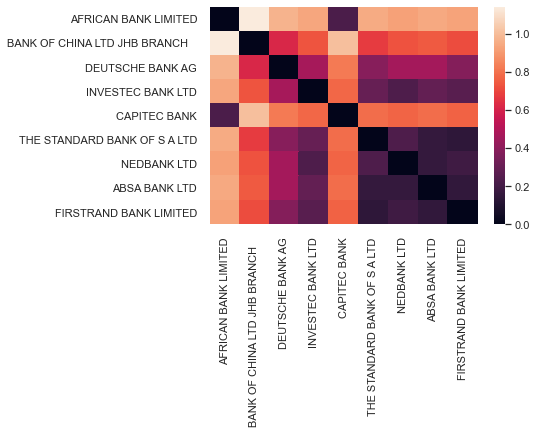

In [63]:

# show portfolio weights for absa's credit book
from assets_to_weights import *

transform=tranformer()
years=[str(i) for i in range(2008,2021, 1)]
months=["{:02d}".format(i) for i in range(1,13)]

top4=[ 'ABSA BANK LTD ',\
        'THE STANDARD BANK OF S A LTD ',\
        MASTER[MASTER['InstitutionDescription'].str.contains('NEDBANK')]['InstitutionDescription'].values[0],\
        MASTER[MASTER['InstitutionDescription'].str.contains('FIRSTRAND')]['InstitutionDescription'].values[0],\
#         MASTER[MASTER['InstitutionDescription'].str.contains('CAPITEC BANK')]['InstitutionDescription'].values[0]
      ]

allbanks=MASTER['InstitutionDescription'].unique()
selected=[ #'SASFIN BANK LTD ','BIDVEST BANK LIMITED ',\
         'AFRICAN BANK LIMITED ', 'BANK OF CHINA LTD JHB BRANCH    ',\
#          ,'THE S A BANK OF ATHENS LTD ',
         'DEUTSCHE BANK AG ','INVESTEC BANK LTD ','CAPITEC BANK ',\
          'THE STANDARD BANK OF S A LTD ',
          'NEDBANK LTD ','ABSA BANK LTD ', 'FIRSTRAND BANK LIMITED ',  
         ]

df=MASTER[MASTER.InstitutionDescription.isin(selected)]
   
y = ['2008','2018']
m = ['11','12']
data=transform.get_weights_banks_timeseries_29assets(y,m,df,selected)
t=transform.create_similarity_matrix(selected,data,list(data.keys())[0])
 # Make heatmap
import pandas as pd
import numpy as np 
import seaborn as sns; sns.set_theme()
 
cmap = sns.cm.rocket #sns.cm.rocket_r

heat=t.apply(pd.to_numeric)
ax = sns.heatmap(heat,  cmap=cmap)
t


,SASFIN BANK LTD,BIDVEST BANK LIMITED,NEDBANK LTD,AFRICAN BANK LIMITED,BIDVEST BANK LIMITED,ABSA BANK LTD,FIRSTRAND BANK LIMITED,DEUTSCHE BANK AG,INVESTEC BANK LTD,CAPITEC BANK,BANK OF CHINA LTD JHB BRANCH
SASFIN BANK LTD,0,0.369134,0.413939,0.977996,0.369134,0.486682,0.415983,0.555967,0.442917,0.815716,0.751039
BIDVEST BANK LIMITED,0.369134,0,0.357339,0.928986,0,0.450222,0.381376,0.410536,0.393342,0.754988,0.568811
NEDBANK LTD,0.413939,0.357339,0,0.926219,0.357339,0.158458,0.190355,0.464014,0.235333,0.766829,0.727618
AFRICAN BANK LIMITED,0.977996,0.928986,0.926219,0,0.928986,0.945728,0.927062,0.973853,0.938647,0.225971,1.14094
BIDVEST BANK LIMITED,0.369134,0,0.357339,0.928986,0,0.450222,0.381376,0.410536,0.393342,0.754988,0.568811
ABSA BANK LTD,0.486682,0.450222,0.158458,0.945728,0.450222,0,0.148015,0.464525,0.2904,0.792006,0.744922
FIRSTRAND BANK LIMITED,0.415983,0.381376,0.190355,0.927062,0.381376,0.148015,0,0.382814,0.259065,0.764923,0.713347
DEUTSCHE BANK AG,0.555967,0.410536,0.464014,0.973853,0.410536,0.464525,0.382814,0,0.47104,0.823429,0.615718
INVESTEC BANK LTD,0.442917,0.393342,0.235333,0.938647,0.393342,0.2904,0.259065,0.47104,0,0.778911,0.732305
CAPITEC BANK,0.815716,0.754988,0.766829,0.225971,0.754988,0.792006,0.764923,0.823429,0.778911,0,1.00756


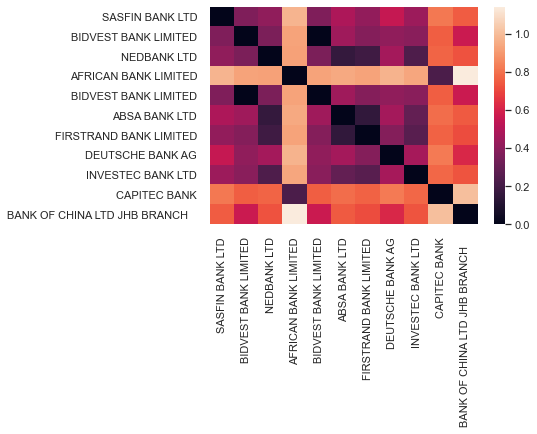

In [54]:
 
cmap = sns.cm.rocket #sns.cm.rocket_r

heat=t.apply(pd.to_numeric)
ax = sns.heatmap(heat,  cmap=cmap)
t


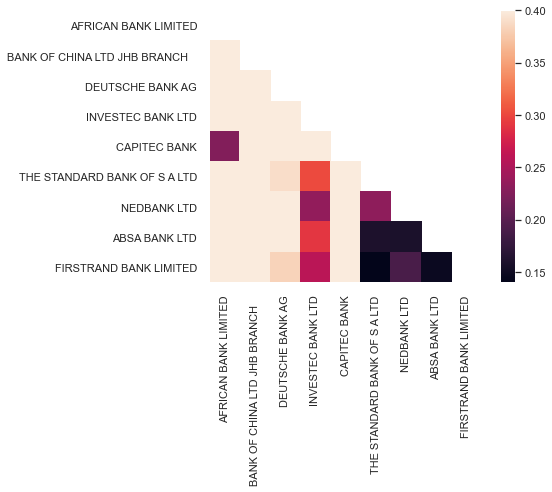

In [64]:
cmap = sns.cm.rocket_r #sns.cm.rocket_r
 
mask = np.zeros_like(heat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(heat, mask=mask, vmax=.4, square=True)

/Users/admin/git_repos/ba900/assets_to_weights.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BANK['Value'] = pd.to_numeric(BANK['Value'])
/Users/admin/git_repos/ba900/assets_to_weights.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["m{}_{}".format(count,name)]= 0
/Users/admin/git_repos/ba900/assets_to_weights.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

2008  processed
2018  processed


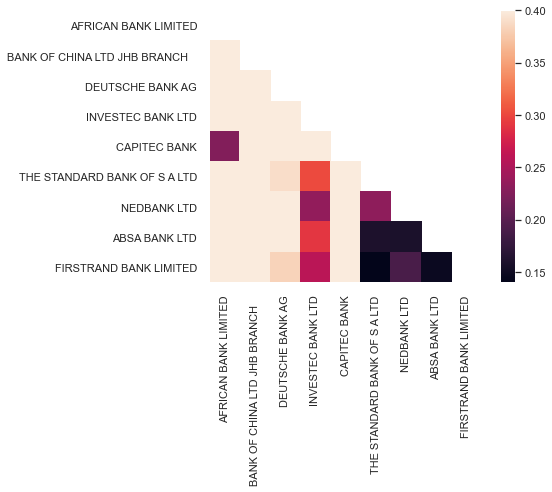

In [65]:
# show portfolio weights for absa's credit book
from assets_to_weights import *

transform=tranformer()
years=[str(i) for i in range(2008,2021, 1)]
months=["{:02d}".format(i) for i in range(1,13)]

top4=[ 'ABSA BANK LTD ',\
        'THE STANDARD BANK OF S A LTD ',\
        MASTER[MASTER['InstitutionDescription'].str.contains('NEDBANK')]['InstitutionDescription'].values[0],\
        MASTER[MASTER['InstitutionDescription'].str.contains('FIRSTRAND')]['InstitutionDescription'].values[0],\
#         MASTER[MASTER['InstitutionDescription'].str.contains('CAPITEC BANK')]['InstitutionDescription'].values[0]
      ]

allbanks=MASTER['InstitutionDescription'].unique()
selected=[ #'SASFIN BANK LTD ','BIDVEST BANK LIMITED ',\
         'AFRICAN BANK LIMITED ', 'BANK OF CHINA LTD JHB BRANCH    ',\
#          ,'THE S A BANK OF ATHENS LTD ',
         'DEUTSCHE BANK AG ','INVESTEC BANK LTD ','CAPITEC BANK ',\
          'THE STANDARD BANK OF S A LTD ',
          'NEDBANK LTD ','ABSA BANK LTD ', 'FIRSTRAND BANK LIMITED ',  
         ]

df=MASTER[MASTER.InstitutionDescription.isin(selected)]
   
y = ['2008','2018']
m = ['11','12']
data=transform.get_weights_banks_timeseries_29assets(y,m,df,selected)
t=transform.create_similarity_matrix(selected,data,list(data.keys())[1])
 
cmap = sns.cm.rocket_r #sns.cm.rocket_r
 
mask = np.zeros_like(heat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(heat, mask=mask, vmax=.4, square=True)

In [68]:
t2 = t.mean().to_frame().T
t2.mean(axis=1) #mean 

,AFRICAN BANK LIMITED,BANK OF CHINA LTD JHB BRANCH,DEUTSCHE BANK AG,INVESTEC BANK LTD,CAPITEC BANK,THE STANDARD BANK OF S A LTD,NEDBANK LTD,ABSA BANK LTD,FIRSTRAND BANK LIMITED
0,0.817032,0.700262,0.523738,0.442908,0.675618,0.407018,0.415856,0.419168,0.394751


In [85]:
# show portfolio weights for absa's credit book
from assets_to_weights import *

transform=tranformer()
years=[str(i) for i in range(2008,2021, 1)]
months=["{:02d}".format(i) for i in range(1,13)]

# top4=[ 'ABSA BANK LTD ',\
#         'THE STANDARD BANK OF S A LTD ',\
#         MASTER[MASTER['InstitutionDescription'].str.contains('NEDBANK')]['InstitutionDescription'].values[0],\
#         MASTER[MASTER['InstitutionDescription'].str.contains('FIRSTRAND')]['InstitutionDescription'].values[0],\
# #         MASTER[MASTER['InstitutionDescription'].str.contains('CAPITEC BANK')]['InstitutionDescription'].values[0]
#       ]

allbanks=MASTER['InstitutionDescription'].unique()
selected=[ 'SASFIN BANK LTD ','BIDVEST BANK LIMITED ',\
         'AFRICAN BANK LIMITED ', 'BANK OF CHINA LTD JHB BRANCH    ',\
#          ,'THE S A BANK OF ATHENS LTD ',
         'DEUTSCHE BANK AG ','INVESTEC BANK LTD ','CAPITEC BANK ',\
          'THE STANDARD BANK OF S A LTD ',
          'NEDBANK LTD ','ABSA BANK LTD ', 'FIRSTRAND BANK LIMITED ',  
         ]

df=MASTER[MASTER.InstitutionDescription.isin(selected)]
   
y = ['2008','2018']
m = ['12']
data=transform.get_weights_banks_timeseries_29assets(y,m,df,selected)
t_before=transform.create_similarity_matrix(selected,data,list(data.keys())[0])
t_after=transform.create_similarity_matrix(selected,data,list(data.keys())[1])

t1 = t_before.mean().to_frame().T
before=t1.mean(axis=1).values[0] #mean 

t2 = t_after.mean().to_frame().T
after=t2.mean(axis=1).values[0] #mean 
before, after

2008  processed
2018  processed


(0.5349731252303914, 0.4934863294108889)

In [76]:
# !pip install seaborn

In [81]:
# show portfolio weights for absa's credit book
from assets_to_weights import *

transform=tranformer()
years=[str(i) for i in range(2008,2021, 1)]
months=["{:02d}".format(i) for i in range(1,13)]

top4=[ 'ABSA BANK LTD ',\
        'THE STANDARD BANK OF S A LTD ',\
        MASTER[MASTER['InstitutionDescription'].str.contains('NEDBANK')]['InstitutionDescription'].values[0],\
        MASTER[MASTER['InstitutionDescription'].str.contains('FIRSTRAND')]['InstitutionDescription'].values[0],\
#         MASTER[MASTER['InstitutionDescription'].str.contains('CAPITEC BANK')]['InstitutionDescription'].values[0]
      ]

 
df=MASTER[MASTER.InstitutionDescription.isin(top4)]
   
y = ['2008','2018']
m = ['12']
data=transform.get_weights_banks_timeseries_29assets(y,m,df,top4)
t_before=transform.create_similarity_matrix(top4,data,list(data.keys())[0])
t_after=transform.create_similarity_matrix(top4,data,list(data.keys())[1])

t1 = t_before.mean().to_frame().T
before=t1.mean(axis=1).values[0] #mean 

t2 = t_after.mean().to_frame().T
after=t2.mean(axis=1).values[0] #mean 
before, after

2008  processed
2018  processed


(0.1323930630272472, 0.10099799313365689)

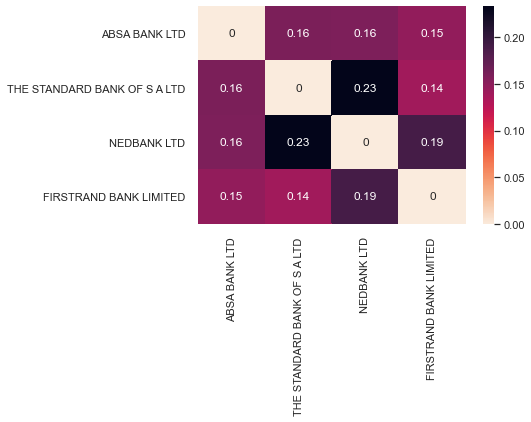

In [97]:
# show portfolio weights for absa's credit book
from assets_to_weights import *

transform=tranformer()
years=[str(i) for i in range(2008,2021, 1)]
months=["{:02d}".format(i) for i in range(1,13)]

# top4=[ 'ABSA BANK LTD ',\
#         'THE STANDARD BANK OF S A LTD ',\
#         MASTER[MASTER['InstitutionDescription'].str.contains('NEDBANK')]['InstitutionDescription'].values[0],\
#         MASTER[MASTER['InstitutionDescription'].str.contains('FIRSTRAND')]['InstitutionDescription'].values[0],\
# #         MASTER[MASTER['InstitutionDescription'].str.contains('CAPITEC BANK')]['InstitutionDescription'].values[0]
#       ]

allbanks=MASTER['InstitutionDescription'].unique()
selected=[  'SASFIN BANK LTD ','BIDVEST BANK LIMITED ',\
          'HBZ BANK LTD ','JPMORGAN CHASE BANK             ',
         'AFRICAN BANK LIMITED ', 'BANK OF CHINA LTD JHB BRANCH    ',\
          'GRINDROD BANK LTD ', 'STANDARD CHARTERED BANK ',
          #          ,'THE S A BANK OF ATHENS LTD ',
         'DEUTSCHE BANK AG ','INVESTEC BANK LTD ','CAPITEC BANK ',\
          'THE STANDARD BANK OF S A LTD ','STATE BANK OF INDIA ',
          'NEDBANK LTD ','ABSA BANK LTD ', 'FIRSTRAND BANK LIMITED ',  \
            'SOCIETE GENERALE JOHANNESBURG   BRANCH ', 'CITIBANK N.A ',
           'GBS MUTUAL BANK ','ALBARAKA BANK LTD ',
          'THE STANDARD BANK OF S A LTD ','HABIB OVERSEAS BANK LTD ','BANK OF BARODA ',
            'MERCANTILE BANK LTD ','BANK OF TAIWAN SOUTH AFRICA     BRANCH ',
         ]

df=MASTER[MASTER.InstitutionDescription.isin(selected)]
   
y = ['2008','2018']
m = ['12']
data=transform.get_weights_banks_timeseries_29assets(y,m,df,selected)



t_before=transform.create_similarity_matrix(selected,data,list(data.keys())[0])

t1 = t_before.mean().to_frame().T
before=t1.mean(axis=1).values[0] #mean 



t_after=transform.create_similarity_matrix(selected,data,list(data.keys())[1])

t2 = t_after.mean().to_frame().T
after=t2.mean(axis=1).values[0] #mean 
before, after

2008  processed
2018  processed


(0.581909943519265, 0.5565516983255736)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
file_list=[]


for filename in os.listdir('./data/output/'):
    if filename.endswith(".pkl"): # or '2010' in filename:
        unpickle = './data/output/'+str(filename)
        print(unpickle)
        file_list.append(pd.read_pickle(unpickle))
 
 
MASTER = pd.concat(file_list)
MASTER['time'] = pd.to_datetime(MASTER['time'])


./data/output/df2013.pkl
./data/output/df2012.pkl
./data/output/df2010.pkl
./data/output/df2011.pkl
./data/output/df2015.pkl
./data/output/df2014.pkl
./data/output/df2016.pkl
./data/output/df2017.pkl
./data/output/df2019.pkl
./data/output/df2018.pkl
./data/output/df2008.pkl
./data/output/df2020.pkl
./data/output/df2009.pkl


In [ ]:

# print(MASTER.columns)
from assets_to_weights import *

transform=tranformer()
years=[str(i) for i in range(2008,2021, 1)]
months=["{:02d}".format(i) for i in range(1,13)]

# top4=[ 'ABSA BANK LTD ',\
#         'THE STANDARD BANK OF S A LTD ',\
#         MASTER[MASTER['InstitutionDescription'].str.contains('NEDBANK')]['InstitutionDescription'].values[0],\
#         MASTER[MASTER['InstitutionDescription'].str.contains('FIRSTRAND')]['InstitutionDescription'].values[0],\
# #         MASTER[MASTER['InstitutionDescription'].str.contains('CAPITEC BANK')]['InstitutionDescription'].values[0]
#       ]

allbanks=MASTER['InstitutionDescription'].unique()
selected=['HBZ BANK LTD ','JPMORGAN CHASE BANK             ',
         'AFRICAN BANK LIMITED ', 'BANK OF CHINA LTD JHB BRANCH    ',\
          'GRINDROD BANK LTD ', 'STANDARD CHARTERED BANK ',
          #   'BIDVEST BANK LIMITED ',       ,'THE S A BANK OF ATHENS LTD ',
         'DEUTSCHE BANK AG ','INVESTEC BANK LTD ','CAPITEC BANK ',\
          'THE STANDARD BANK OF S A LTD ','STATE BANK OF INDIA ',
          'NEDBANK LTD ','ABSA BANK LTD ', 'FIRSTRAND BANK LIMITED ',  \
            'SOCIETE GENERALE JOHANNESBURG   BRANCH ', 'CITIBANK N.A ',
           'GBS MUTUAL BANK ','ALBARAKA BANK LTD ',
          'THE STANDARD BANK OF S A LTD ','HABIB OVERSEAS BANK LTD ','BANK OF BARODA ',
            'MERCANTILE BANK LTD ','BANK OF TAIWAN SOUTH AFRICA     BRANCH ',
         ]

df=MASTER[MASTER.InstitutionDescription.isin(selected)]
   
y = ['2008','2009','2010','2011','2012','2013', '2014','2015','2016','2017','2018', '2019']
m = months
data=transform.get_weights_banks_timeseries_29assets(y,m,df,selected)

results=[]
for key in list(data.keys()):
    print(key)
    t=transform.create_similarity_matrix(selected,data,key).mean().to_frame().T
    results.append(t.mean(axis=1).values[0])

pd.DataFrame(results).plot()

/Users/admin/git_repos/ba900/assets_to_weights.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BANK['Value'] = pd.to_numeric(BANK['Value'])
/Users/admin/git_repos/ba900/assets_to_weights.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["m{}_{}".format(count,name)]= 0
/Users/admin/git_repos/ba900/assets_to_weights.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

2008  processed
HBZ BANK LTD  did not work
JPMORGAN CHASE BANK              did not work
AFRICAN BANK LIMITED  did not work
BANK OF CHINA LTD JHB BRANCH     did not work
GRINDROD BANK LTD  did not work
STANDARD CHARTERED BANK  did not work
DEUTSCHE BANK AG  did not work
INVESTEC BANK LTD  did not work
CAPITEC BANK  did not work
THE STANDARD BANK OF S A LTD  did not work
STATE BANK OF INDIA  did not work
NEDBANK LTD  did not work
ABSA BANK LTD  did not work
FIRSTRAND BANK LIMITED  did not work
SOCIETE GENERALE JOHANNESBURG   BRANCH  did not work
CITIBANK N.A  did not work
GBS MUTUAL BANK  did not work
ALBARAKA BANK LTD  did not work
THE STANDARD BANK OF S A LTD  did not work
HABIB OVERSEAS BANK LTD  did not work
BANK OF BARODA  did not work
MERCANTILE BANK LTD  did not work
BANK OF TAIWAN SOUTH AFRICA     BRANCH  did not work
2009  processed
2010  processed


In [87]:
'SASFIN BANK LTD ','BIDVEST BANK LIMITED ','NEDBANK LTD ',\
         'AFRICAN BANK LIMITED ','BIDVEST BANK LIMITED ',\
          'ABSA BANK LTD ', 'FIRSTRAND BANK LIMITED ',  \
#          ,'THE S A BANK OF ATHENS LTD ',
         'DEUTSCHE BANK AG ','INVESTEC BANK LTD ','CAPITEC BANK ',\
          'BANK OF CHINA LTD JHB BRANCH    ',\
           'SOCIETE GENERALE JOHANNESBURG   BRANCH ', 'CITIBANK N.A ',
           'GBS MUTUAL BANK ','ALBARAKA BANK LTD ',
          'THE STANDARD BANK OF S A LTD ','HABIB OVERSEAS BANK LTD ','BANK OF BARODA ',
            'MERCANTILE BANK LTD ','BANK OF TAIWAN SOUTH AFRICA     BRANCH ',
            
            

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 9)

In [ ]:
  array(['SASFIN BANK LTD ', 'BIDVEST BANK LIMITED ', 'ALBARAKA BANK LTD ',
       'GROBANK LTD ', 'STATE BANK OF INDIA ', 'NEDBANK LTD ',
       'BANK OF BARODA ', 'DISCOVERY BANK LIMITED ', 'ABSA BANK LTD ',
       'GBS MUTUAL BANK ', 'BANK OF TAIWAN SOUTH AFRICA     BRANCH ',
       'TYMEDIGITAL BY COMMONWEALTHBANK SA ', 'INVESTEC BANK LTD ',
       'HABIB OVERSEAS BANK LTD ',
       'SOCIETE GENERALE JOHANNESBURG   BRANCH ', 'AFRICAN BANK LIMITED ',
       'JPMORGAN CHASE BANK             ', 'GRINDROD BANK LTD ',
       'CITIBANK N.A ', 'CAPITEC BANK ', 'VBS MUTUAL BANK ',
       'BANK OF CHINA LTD JHB BRANCH    ', 'ICICI BANK LIMITED ',
       'THE STANDARD BANK OF S A LTD ', 'HBZ BANK LTD ',
       'CHINA CONSTRUCTION BANK         CORPORATION - JHB BRANCH ',
       'THE HONGKONG AND SHANGHAI BANKING CORPORATION LIMITED - JOHANNESBURG BRANCH ',
       'MERCANTILE BANK LTD ', 'CANARA BANK ',
       'BNP PARIBAS SOUTH AFRICA BRANCH ', 'DEUTSCHE BANK AG ',
       'BANK OF INDIA - JOHANNESBURG BRANCH ', 'UBANK LIMITED ',
       'FIRSTRAND BANK LIMITED ', 'FINBOND MUTUAL BANK ',
       'STANDARD CHARTERED BANK ', '*TOTAL*',
       'COMMONWEALTH BANK OF SOUTH AFRICA ',
       'THE S A BANK OF ATHENS LTD ', 'IMPERIAL BANK LTD ',
       'MEEG BANK LIMITED ', 'COMMERZBANK AKTIENGESELLSCHAFT ',
       'CREDIT AGRICOLE CORPORATE AND INVESTMENT BANK ',
       'REGAL TREASURY PRIVATE BANK LTD ', 'THE ROYAL BANK OF SCOTLAND '],
      dtype=object)